In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite 2")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_data = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [5]:
# 2. Convert the June temperatures to a list.
june_results = list(np.ravel(june_data))

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_results, columns=['June Temps'])

In [8]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [ ]:
# 5. Return to your challenge instructions to compare your summary statistics

## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_data = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_results = list(np.ravel(dec_data))

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_results, columns=['December Temps'])

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
# 10. Return to your challenge instructions to compare your summary statistics

In [14]:
#Create a query that filters the average precipitation per month
avg_prcp_per_month = session.query(extract('month', Measurement.date), func.avg(Measurement.prcp)).group_by(extract('month', Measurement.date)).all()

In [15]:
#Create a DataFrame from the list of average precitipations per month
avg_prcp_per_month_df = pd.DataFrame(avg_prcp_per_month, columns=['Month', 'Average Precipitation'])

Text(0, 0.5, 'Average Precipitation')

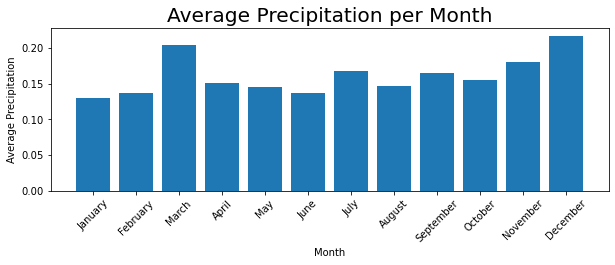

In [16]:
#Plot the average precipitation per month
x = avg_prcp_per_month_df['Month']
y = avg_prcp_per_month_df['Average Precipitation']

fig, ax = plt.subplots(figsize=(10,3))

plt.style.use('fivethirtyeight')

plt.bar(x,y)

ax.set_title('Average Precipitation per Month')

ax.set_xlabel('Month')

ax.set_xticks(np.arange(1,13), ('January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'), rotation=45)

ax.set_ylabel('Average Precipitation')

In [17]:
#Create a query that filters the average station temperatures per month
avg_station_temp_per_month = session.query(extract('month', Measurement.date), func.avg(Measurement.tobs)).group_by(extract('month', Measurement.date)).all()

#Create a DataFrame from the list of average station temperatures per month
avg_station_temp_per_month_df = pd.DataFrame(avg_station_temp_per_month, columns=['Month', 'Average Station Temperature'])

#Plot the average station temperatures per month
x = avg_station_temp_per_month_df['Month']

y = avg_station_temp_per_month_df['Average Station Temperature']